In [25]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import cv2  
import time

In [26]:
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Read image as numpy array
        if img is not None:
            img = cv2.resize(img, image_size)  # Resize to consistent size
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)
    return images, labels

cat_images, cat_labels = load_images_from_folder('animals/cat', 0)
dog_images, dog_labels = load_images_from_folder('animals/dog', 1)
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)
X = X.reshape(len(X), -1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [29]:
results = {
    "Model": [],
    "Accuracy": [],
    "Training Time (s)": [],
    "Testing Time (s)": []
}

for model_name, model in models.items():
 
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    training_time = end_train - start_train
    testing_time = end_test - start_test
   
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Training Time (s)"].append(training_time)
    results["Testing Time (s)"].append(testing_time)


results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Training Time (s)  Testing Time (s)
0  Logistic Regression     0.795          24.323942          0.059181
1                  SVC     0.850          11.902204          4.910539
2                  KNN     0.770           0.108086          1.581782
3        Decision Tree     0.705          23.195186          0.070463
4        Random Forest     0.825          21.495922          0.097207
5    Gradient Boosting     0.870         699.544863          0.104507


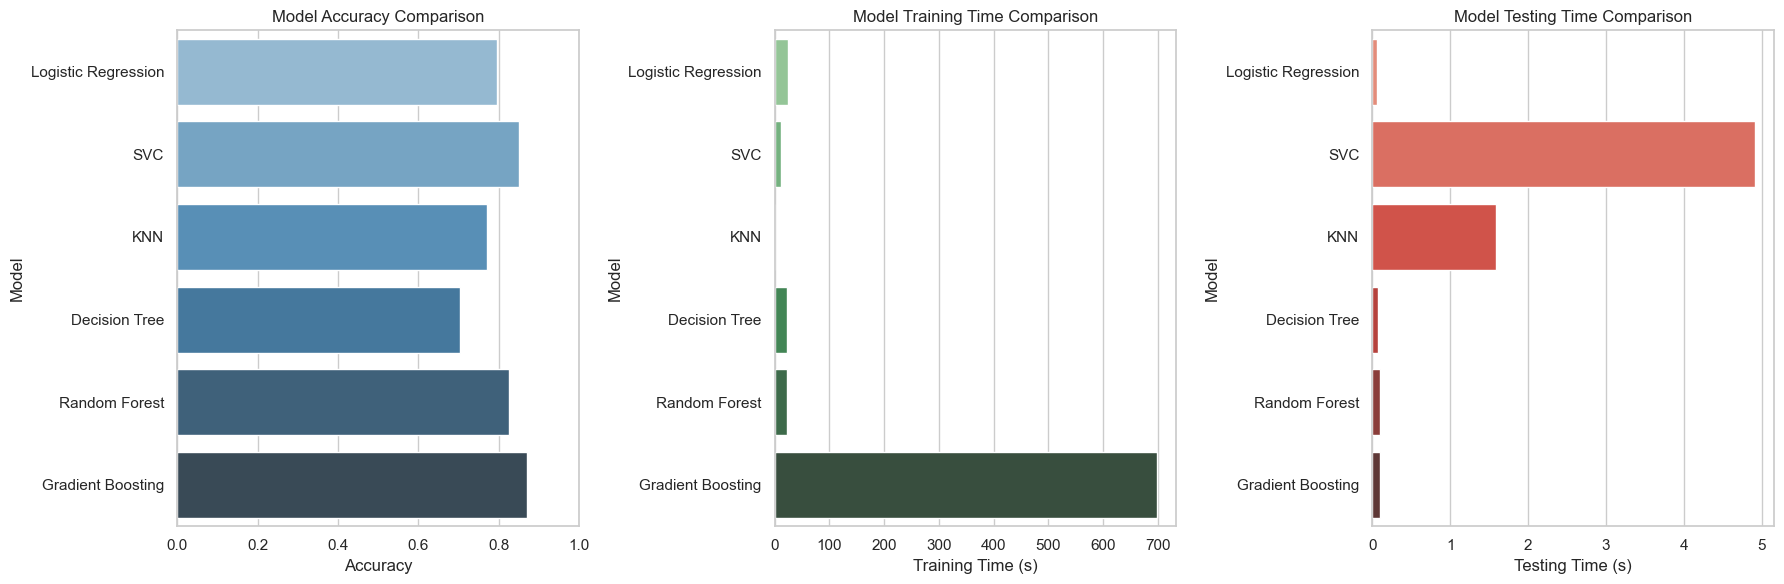

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set(style="whitegrid")

# Plot comparison charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy Comparison
sns.barplot(x="Accuracy", y="Model", data=results_df, ax=axes[0], palette="Blues_d")
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_xlim(0, 1)  # Accuracy is between 0 and 1

# Training Time Comparison
sns.barplot(x="Training Time (s)", y="Model", data=results_df, ax=axes[1], palette="Greens_d")
axes[1].set_title("Model Training Time Comparison")

# Testing Time Comparison
sns.barplot(x="Testing Time (s)", y="Model", data=results_df, ax=axes[2], palette="Reds_d")
axes[2].set_title("Model Testing Time Comparison")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
